In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
sns.__version__

'0.9.0'

In [72]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [73]:
# import pandas_profiling
# pandas_profiling.ProfileReport(train_df)

In [74]:
train_df.head()

Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.322604              78.86                   7   
3               0.337029              81.79                   3   
4               0.541140              77.16                   3   

   Max_Elevation  Violations  Adverse_Weather_Metric  Accident_ID  
0   31335.476824           3                0.424352         7570  
1   26024.711057           2                0.352350        12128  
2   39269.053927           3                0.003364         2181  
3   42771.499200           1                0.211728         5946  
4   35509.228515           2                0.176883         9054

In [75]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_df.Severity=lb.fit_transform(train_df.Severity)

In [76]:
train_df.head()

Severity  Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0         1     49.223744                     14                       22   
1         1     62.465753                     10                       27   
2         2     63.059361                     13                       16   
3         3     48.082192                     11                        9   
4         2     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   2   31335.476824           3                0.424352   
1                   2   26024.711057           2                0.352350   
2                   7   39269.053927           3                0.003364   
3                   3   42771.499200           1                0.211728   
4                   3   35509.228515           2                0.176883   

   Accident_ID  
0         7570  
1        12128  
2         2181  
3         5946  
4         9054

In [77]:
test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID  
0            1  
1           10  
2           14  
3           17  
4           21

In [78]:
train_df.shape

(10000, 12)

In [79]:
test_df.shape

(2500, 11)

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null int64
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


In [82]:
train_df.describe()

Severity  Safety_Score  Days_Since_Inspection  \
count  10000.000000  10000.000000           10000.000000   
mean       1.410400     41.876406              12.931100   
std        1.182249     16.138072               3.539803   
min        0.000000      0.000000               1.000000   
25%        0.000000     30.593607              11.000000   
50%        1.000000     41.278539              13.000000   
75%        3.000000     52.511416              15.000000   
max        3.000000    100.000000              23.000000   

       Total_Safety_Complaints  Control_Metric  Turbulence_In_gforces  \
count             10000.000000    10000.000000           10000.000000   
mean                  6.564300       65.145324               0.381495   
std                   6.971982       11.882934               0.121301   
min                   0.000000        0.000000               0.134000   
25%                   2.000000       56.927985               0.293665   
50%                   4.000000       65.587967               0.365879   
75%                   9.000000       73.336372               0.451346   
max                  54.000000      100.000000               0.882648   

       Cabin_Temperature  Accident_Type_Code  Max_Elevation   Violations  \
count       10000.000000        10000.000000   10000.000000  10000.00000   
mean           79.969331            3.814900   32001.803282      2.01220   
std             2.759739            1.902577    9431.995196      1.03998   
min            74.740000            1.000000     831.695553      0.00000   
25%            77.960000            2.000000   25757.636908      1.00000   
50%            79.540000            4.000000   32060.336419      2.00000   
75%            81.560000            5.000000   38380.641513      3.00000   
max            97.510000            7.000000   64297.651218      5.00000   

       Adverse_Weather_Metric   Accident_ID  
count            10000.000000  10000.000000  
mean                 0.255635   6266.554200  
std                  0.381128   3610.170288  
min                  0.000316      2.000000  
25%                  0.012063   3139.750000  
50%                  0.074467   6280.500000  
75%                  0.354059   9391.500000  
max                  2.365378  12500.000000

In [83]:
test_df.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count   2500.000000            2500.000000              2500.000000   
mean      41.825224              12.946400                 6.574800   
std       16.280187               3.523364                 7.179542   
min        0.000000               1.000000                 0.000000   
25%       30.593607              11.000000                 1.000000   
50%       41.461187              13.000000                 4.000000   
75%       52.751142              15.000000                 9.000000   
max      100.000000              23.000000                54.000000   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count     2500.000000            2500.000000        2500.000000   
mean        65.368058               0.376197          79.993068   
std         11.442005               0.116960           2.713833   
min         20.966272               0.143376          74.740000   
25%         57.702826               0.292583          77.930000   
50%         66.066545               0.357404          79.600000   
75%         73.119872               0.441699          81.530000   
max         97.994531               0.881926          94.200000   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count         2500.000000    2500.000000  2500.000000             2500.000000   
mean             3.853600   32383.134179     1.990800                0.250886   
std              1.877652    9485.096436     1.018592                0.387663   
min              1.000000     831.695553     0.000000                0.000368   
25%              2.000000   26008.851717     1.000000                0.013136   
50%              4.000000   32472.865497     2.000000                0.072466   
75%              5.000000   38759.519071     3.000000                0.315407   
max              7.000000   62315.408444     5.000000                2.365378   

        Accident_ID  
count   2500.000000  
mean    6186.283200  
std     3602.235035  
min        1.000000  
25%     3071.750000  
50%     6159.500000  
75%     9309.250000  
max    12493.000000

In [84]:
train_df.loc[train_df.Control_Metric==0.0,['Control_Metric']]=65.14

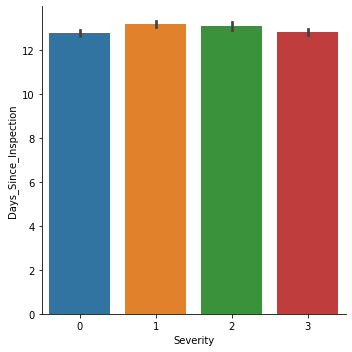

In [85]:
sns.catplot(x="Severity",y="Days_Since_Inspection",kind='bar',data=train_df)

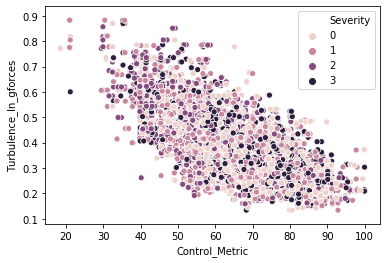

In [86]:
sns.scatterplot(x="Control_Metric",y="Turbulence_In_gforces",data=train_df,hue='Severity')

In [87]:
lb.inverse_transform([0,1,2,3])

array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
       'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries'], dtype=object)

In [88]:
X=train_df.drop(['Severity'],axis=1)

In [89]:
X.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     49.223744                     14                       22   
1     62.465753                     10                       27   
2     63.059361                     13                       16   
3     48.082192                     11                        9   
4     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   2   31335.476824           3                0.424352   
1                   2   26024.711057           2                0.352350   
2                   7   39269.053927           3                0.003364   
3                   3   42771.499200           1                0.211728   
4                   3   35509.228515           2                0.176883   

   Accident_ID  
0         7570  
1        12128  
2         2181  
3         5946  
4         9054

In [90]:
# from scipy import stats
# fig = plt.figure()
# res = stats.probplot(X['Total_Safety_Complaints'], plot=plt)
# plt.show()


In [91]:
# from scipy.stats import skew
# numeric_feats = X.dtypes[X.dtypes != "object"].index

In [92]:
# new_tsc=np.log(1+X.Total_Safety_Complaints)

In [93]:
# fig = plt.figure()
# res = stats.probplot(new_tsc, plot=plt)
# plt.show()

In [94]:
Y=train_df.Severity

In [95]:
# fig = plt.figure()
# res = stats.probplot(X['Accident_Type_Code'], plot=plt)
# plt.show()


In [96]:
# new_atc=np.log(1+X.Accident_Type_Code)

In [97]:
# fig = plt.figure()
# res = stats.probplot(new_atc, plot=plt)
# plt.show()


In [98]:
# fig = plt.figure()
# res = stats.probplot(X['Adverse_Weather_Metric'], plot=plt)
# plt.show()


In [99]:
# new_awm=np.log(1+X.Adverse_Weather_Metric)

In [100]:
# fig = plt.figure()
# res = stats.probplot(new_awm, plot=plt)
# plt.show()


In [101]:
# new_awm=np.sqrt(1+X.Adverse_Weather_Metric)

In [102]:
# fig = plt.figure()
# res = stats.probplot(new_awm, plot=plt)
# plt.show()


In [103]:
X.shape

(10000, 11)

In [104]:
Y.shape

(10000,)

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [107]:
# gb.feature_importances_

In [108]:
# gb.fit(X_train.drop(['Accident_ID'],axis=1),y_train)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [110]:
gb=GradientBoostingClassifier(n_estimators=500,learning_rate=0.3,max_depth=7,random_state=42)

In [111]:
# gb.fit(X_train.drop(['Accident_ID'],axis=1),y_train)

In [112]:
# y_pred=gb.predict(X_test.drop(['Accident_ID'],axis=1))
# f1_score(y_test, y_pred, average='weighted')

In [113]:
gb.fit(X_train.drop(['Accident_ID','Violations'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Accident_ID','Violations'],axis=1))
f1_score(y_test, y_pred, average='weighted')

0.9674953516776615

In [114]:
gb.fit(X.drop(['Accident_ID','Violations'],axis=1),Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
gb_pred=gb.predict(test_df.drop(['Accident_ID','Violations'],axis=1))

In [116]:
# pip install category_encoders

In [117]:
# import category_encoders as ce

In [118]:
# encoder = ce.TargetEncoder(cols=['Days_Since_Inspection','Total_Safety_Complaints','Accident_Type_Code','Violations']).fit(X,Y)

In [119]:
X.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     49.223744                     14                       22   
1     62.465753                     10                       27   
2     63.059361                     13                       16   
3     48.082192                     11                        9   
4     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   2   31335.476824           3                0.424352   
1                   2   26024.711057           2                0.352350   
2                   7   39269.053927           3                0.003364   
3                   3   42771.499200           1                0.211728   
4                   3   35509.228515           2                0.176883   

   Accident_ID  
0         7570  
1        12128  
2         2181  
3         5946  
4         9054

In [120]:
# from scipy import stats
# fig = plt.figure()
# res = stats.probplot(X_train['Total_Safety_Complaints'], plot=plt)
# plt.show()

In [121]:
# numeric_dataset = encoder.transform(X)

In [122]:
# numeric_dataset.head()

In [123]:
# X_train, X_test, y_train, y_test = train_test_split(numeric_dataset, Y, test_size=0.2, random_state=42)

In [124]:
# gb.fit(X_train.drop(['Accident_ID'],axis=1),y_train)


In [125]:
# y_pred=gb.predict(X_test.drop(['Accident_ID'],axis=1))
# f1_score(y_test, y_pred, average='weighted')

In [126]:
test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID  
0            1  
1           10  
2           14  
3           17  
4           21

In [127]:
new_df2=pd.DataFrame(data={"Accident_ID":test_df["Accident_ID"],"Severity":0})

In [128]:
new_df2.head()

Accident_ID  Severity
0            1         0
1           10         0
2           14         0
3           17         0
4           21         0

In [129]:
new_df2.Severity=gb_pred

In [130]:
new_df2.Severity=lb.inverse_transform(new_df2.Severity)

In [131]:
new_df2

Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]

In [132]:
len(gb_pred)

2500

In [134]:
new_df2.to_csv('sub13459.csv',index=False)

In [0]:
sub=pd.read_csv('sub10.csv')

In [0]:
sub.head()

Accident_ID  Severity
0            1         0
1           10         2
2           14         3
3           17         0
4           21         2

In [0]:
import lightgbm as lgb

In [0]:
d_train = lgb.Dataset(X_train, label=y_train)

In [0]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [0]:
y_pred=clf.predict(X_test)

In [0]:
len(y_pred)

2000

In [0]:
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [0]:
pip install catboost

     |████████████████████████████████| 64.0MB 46kB/s 


In [0]:
from catboost import CatBoostClassifier

In [0]:
model=CatBoostClassifier(iterations=500, depth=7, learning_rate=0.1, loss_function='MultiClass')

In [0]:
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

In [0]:
lgb.fit(X_train.drop(['Accident_ID','Violations'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Accident_ID','Violations'],axis=1))
f1_score(y_test, y_pred, average='weighted')

AttributeError: ignored

In [0]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [0]:
X['sum1']=X.Safety_Score+X.Days_Since_Inspection+X.Control_Metric
X['m1']=X.Safety_Score*X.Days_Since_Inspection
X['m2']=X.Days_Since_Inspection*X.Control_Metric
X['m3']=X.Safety_Score*X.Control_Metric

In [0]:
X['a1']=X.Safety_Score+X.Days_Since_Inspection
X['a2']=X.Control_Metric+X.Days_Since_Inspection
X['a3']=X.Safety_Score+X.Control_Metric

In [0]:
X.head()

Safety_Score  Days_Since_Inspection  ...         a2          a3
0     49.223744                     14  ...  85.285324  120.509068
1     62.465753                     10  ...  82.288058  134.753812
2     63.059361                     13  ...  79.362808  129.422168
3     48.082192                     11  ...  85.703737  122.785929
4     26.484018                     13  ...  60.948952   74.432970

[5 rows x 18 columns]

In [0]:
test_df.head()

Safety_Score  Days_Since_Inspection  ...  Adverse_Weather_Metric  Accident_ID
0     19.497717                     16  ...                0.069692            1
1     58.173516                     15  ...                0.002777           10
2     33.287671                     15  ...                0.004316           14
3      3.287671                     21  ...                0.199990           17
4     10.867580                     18  ...                0.483696           21

[5 rows x 11 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
gb.fit(X_train.drop(['Accident_ID','Violations'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Accident_ID','Violations'],axis=1))
f1_score(y_test, y_pred, average='weighted')

0.9674409021359498

In [0]:
gb.feature_importances_

array([0.05058317, 0.02985308, 0.00461104, 0.23807026, 0.00768609,
       0.00493603, 0.01136295, 0.00448667, 0.01604212, 0.03591105,
       0.49177753, 0.00944563, 0.01462347, 0.06320322, 0.01129516,
       0.00611253])

In [0]:
X.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID', 'sum1', 'm1', 'm2', 'm3', 'a1',
       'a2', 'a3'],
      dtype='object')

In [0]:
gb.fit(X_train.drop(['Cabin_Temperature'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Cabin_Temperature'],axis=1))
f1_score(y_test, y_pred, average='weighted')

0.965957074451847

In [0]:
#sub_df=pd.read_csv('sample_submission.csv')

In [0]:
sub_df.head()

Accident_ID                                 Severity
0            1                Minor_Damage_And_Injuries
1           10                Highly_Fatal_And_Damaging
2           14                Highly_Fatal_And_Damaging
3           17  Significant_Damage_And_Serious_Injuries
4           21                Minor_Damage_And_Injuries

In [0]:
test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   4   37949.724386           2                0.069692   
1                   7   30194.805567           2                0.002777   
2                   6   17572.925484           1                0.004316   
3                   3   40209.186341           2                0.199990   
4                   2   35495.525408           2                0.483696   

   Accident_ID  
0            1  
1           10  
2           14  
3           17  
4           21

In [0]:
new_df2=pd.DataFrame(data={'Accident_ID':test_df.Accident_ID,'Severity':0})

In [0]:
new_df2.head()

Accident_ID  Severity
0            1         0
1           10         0
2           14         0
3           17         0
4           21         0

In [0]:
new_df2.shape

(2500, 2)

In [0]:
#gb.fit(X_train.drop(['Accident_ID'],axis=1),y_train)
#y_pred=gb.predict(X_test.drop(['Accident_ID'],axis=1))

In [0]:
#f1_score(y_test, y_pred, average='weighted')

0.8861896829859404

In [0]:
#gb.fit(X.drop(['Accident_ID'],axis=1),Y)
#y_pred=gb.predict(test_df.drop(['Accident_ID'],axis=1))

In [0]:
len(y_pred)

2500

In [0]:
new_df2.Severity=y_pred

NameError: name 'y_pred' is not defined

In [0]:
new_df2.head()

Accident_ID  Severity
0            1         0
1           10         0
2           14         0
3           17         0
4           21         0

In [0]:
new_df2.Severity=lb.inverse_transform(new_df2.Severity)

In [0]:
new_df2.head()

Accident_ID                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21                Highly_Fatal_And_Damaging

In [0]:
#new_df2.to_csv('sub1.csv',index=False)

In [0]:
train_df.drop(['Accident_ID'],axis=1,inplace=True)
test_df.drop(['Accident_ID'],axis=1,inplace=True)

In [0]:
train_df.head()

Severity  Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0         1     49.223744                     14                       22   
1         1     62.465753                     10                       27   
2         2     63.059361                     13                       16   
3         3     48.082192                     11                        9   
4         2     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   2   31335.476824           3                0.424352  
1                   2   26024.711057           2                0.352350  
2                   7   39269.053927           3                0.003364  
3                   3   42771.499200           1                0.211728  
4                   3   35509.228515           2                0.176883

In [0]:
test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     19.497717                     16                        6   
1     58.173516                     15                        3   
2     33.287671                     15                        3   
3      3.287671                     21                        5   
4     10.867580                     18                        2   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       72.151322               0.388959              78.32   
1       64.585232               0.250841              78.60   
2       64.721969               0.336669              86.96   
3       66.362808               0.421775              80.86   
4       56.107566               0.313228              79.22   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   4   37949.724386           2                0.069692  
1                   7   30194.805567           2                0.002777  
2                   6   17572.925484           1                0.004316  
3                   3   40209.186341           2                0.199990  
4                   2   35495.525408           2                0.483696

In [0]:
X=train_df.drop(['Severity'],axis=1)
Y=train_df.Severity

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
#gb=GradientBoostingClassifier(max_depth=7,n_estimators=500,learning_rate=0.3)
#gb.fit(X_train,y_train)
#y_pred=gb.predict(X_test)
#f1_score(y_test, y_pred, average='weighted')

0.964496018285052

In [0]:
#gb.fit(X,Y)
#y_pred=gb.predict(test_df)

In [0]:
#new_df2.Severity=y_pred

In [0]:
#new_df2.head()

Accident_ID  Severity
0            1         0
1           10         2
2           14         3
3           17         0
4           21         2

In [0]:
new_df2.Severity=lb.inverse_transform(new_df2.Severity)

In [0]:
new_df2.head()

Accident_ID                                 Severity
0            1                Highly_Fatal_And_Damaging
1           10        Significant_Damage_And_Fatalities
2           14  Significant_Damage_And_Serious_Injuries
3           17                Highly_Fatal_And_Damaging
4           21        Significant_Damage_And_Fatalities

In [0]:
#new_df2.to_csv('sub4_gbm_7_500_0.3.csv',index=False)

In [0]:
import xgboost

In [0]:
from xgboost import XGBClassifier
#xg=XGBClassifier(max_depth=7,n_estimators=400,learning_rate=0.1)
#xg.fit(X_train,y_train)
#y_pred=xg.predict(X_test)
#f1_score(y_test, y_pred, average='weighted')

In [0]:
#xg.fit(X,Y)
#y_pred=xg.predict(test_df)

In [0]:
#new_df2.Severity=y_pred
#new_df2.Severity=lb.inverse_transform(new_df2.Severity)
#new_df2.to_csv('sub4_xgb_7_400.csv',index=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
#rf=RandomForestClassifier(max_depth=20,n_estimators=500)
#rf.fit(X_train,y_train)
#y_pred=rf.predict(X_test)
#f1_score(y_test, y_pred, average='weighted')

In [0]:
#rf.fit(X,Y)
#y_pred=rf.predict(test_df)

In [0]:
#new_df2.Severity=y_pred
#new_df2.Severity=lb.inverse_transform(new_df2.Severity)
#new_df2.to_csv('sub4_rf_20_500.csv',index=False)

In [0]:
#train_df['metric']=train_df.

In [0]:
gb=GradientBoostingClassifier(max_depth=7,n_estimators=500,random_state=42)

In [0]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9619850756847611

In [0]:
gb.feature_importances_

array([0.40722331, 0.22042617, 0.00724912, 0.19125297, 0.01331351,
       0.01056994, 0.1160075 , 0.00648214, 0.00213322, 0.02534212])

In [0]:
X_train.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
9254     48.310502                     11                        3   
1561     70.502283                      7                       30   
1670     32.648402                     15                        7   
6087     18.219178                     16                        8   
6669      7.762557                     19                        0   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
9254       62.807657               0.279691              78.63   
1561       67.046490               0.557368              83.13   
1670       47.219690               0.407711              81.18   
6087       59.617138               0.338111              76.95   
6669       65.314494               0.312507              82.36   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
9254                   4   18411.028964           3                0.035089  
1561                   5   28354.121677           0                0.018697  
1670                   3   30205.141106           1                0.151735  
6087                   4   21620.871644           1                0.039676  
6669                   4   41598.375946           2                0.076017

In [0]:
gb.fit(X_train.drop(['Violations'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Violations'],axis=1))
f1_score(y_test, y_pred, average='weighted')

0.9629863317578091

In [0]:
gb.fit(X.drop(['Violations','Max_Elevation'],axis=1),Y)
y_pred=gb.predict(test_df.drop(['Violations','Max_Elevation'],axis=1))

In [0]:
new_df2.Severity=y_pred
new_df2.Severity=lb.inverse_transform(new_df2.Severity)
new_df2.to_csv('sub5_gb_7_400_7f.csv',index=False)

In [0]:
train_df.head()

Severity  Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0         1     49.223744                     14                       22   
1         1     62.465753                     10                       27   
2         2     63.059361                     13                       16   
3         3     48.082192                     11                        9   
4         2     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  
0                   2   31335.476824           3                0.424352  
1                   2   26024.711057           2                0.352350  
2                   7   39269.053927           3                0.003364  
3                   3   42771.499200           1                0.211728  
4                   3   35509.228515           2                0.176883

In [0]:
train_df['metric']=train_df.Control_Metric+train_df.Adverse_Weather_Metric
train_df['Elevation']=(train_df.Max_Elevation//1000)*1000

In [0]:
test_df['metric']=test_df.Control_Metric+test_df.Adverse_Weather_Metric
test_df['Elevation']=(test_df.Max_Elevation//1000)*1000

In [0]:
X=train_df.drop(['Severity'],axis=1)
y=train_df.Severity

In [0]:
X.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0     49.223744                     14                       22   
1     62.465753                     10                       27   
2     63.059361                     13                       16   
3     48.082192                     11                        9   
4     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   2   31335.476824           3                0.424352   
1                   2   26024.711057           2                0.352350   
2                   7   39269.053927           3                0.003364   
3                   3   42771.499200           1                0.211728   
4                   3   35509.228515           2                0.176883   

      metric  Elevation  
0  71.709676    31000.0  
1  72.640408    26000.0  
2  66.366172    39000.0  
3  74.915466    42000.0  
4  48.125835    35000.0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
X_train.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
9254     48.310502                     11                        3   
1561     70.502283                      7                       30   
1670     32.648402                     15                        7   
6087     18.219178                     16                        8   
6669      7.762557                     19                        0   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
9254       62.807657               0.279691              78.63   
1561       67.046490               0.557368              83.13   
1670       47.219690               0.407711              81.18   
6087       59.617138               0.338111              76.95   
6669       65.314494               0.312507              82.36   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
9254                   4   18411.028964           3                0.035089   
1561                   5   28354.121677           0                0.018697   
1670                   3   30205.141106           1                0.151735   
6087                   4   21620.871644           1                0.039676   
6669                   4   41598.375946           2                0.076017   

         metric  Elevation  
9254  62.842746    18000.0  
1561  67.065188    28000.0  
1670  47.371425    30000.0  
6087  59.656813    21000.0  
6669  65.390511    41000.0

In [0]:
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9624851419312827

In [0]:
gb.feature_importances_

array([0.40504931, 0.21991411, 0.00723172, 0.13059195, 0.01281063,
       0.00991808, 0.11722412, 0.00458741, 0.00180082, 0.02457479,
       0.06426864, 0.00202842])

In [0]:
gb.fit(X_train.drop(['Elevation','metric'],axis=1),y_train)
y_pred=gb.predict(X_test.drop(['Elevation','metric'],axis=1))
f1_score(y_test, y_pred, average='weighted')

0.9619850756847611

In [0]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5293903084615638

In [0]:
df_linear=train_df

In [0]:
df_linear_test=test_df

In [0]:
df_linear.head()

Severity  Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0         1     49.223744                     14                       22   
1         1     62.465753                     10                       27   
2         2     63.059361                     13                       16   
3         3     48.082192                     11                        9   
4         2     26.484018                     13                       25   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0       71.285324               0.272118              78.04   
1       72.288058               0.423939              84.54   
2       66.362808               0.322604              78.86   
3       74.703737               0.337029              81.79   
4       47.948952               0.541140              77.16   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0                   2   31335.476824           3                0.424352   
1                   2   26024.711057           2                0.352350   
2                   7   39269.053927           3                0.003364   
3                   3   42771.499200           1                0.211728   
4                   3   35509.228515           2                0.176883   

      metric  Elevation  
0  71.709676    31000.0  
1  72.640408    26000.0  
2  66.366172    39000.0  
3  74.915466    42000.0  
4  48.125835    35000.0

In [0]:
X_linear=df_linear.drop(['Severity'],axis=1)
y_linear=df_linear.Severity

In [0]:
y_linear_numpy=y_linear.to_numpy

In [0]:
y_linear_numpy

<bound method IndexOpsMixin.to_numpy of 0       1
1       1
2       2
3       3
4       2
       ..
9995    3
9996    0
9997    3
9998    1
9999    0
Name: Severity, Length: 10000, dtype: int32>

In [0]:
from sklearn import preprocessing

In [0]:
normalised_X=preprocessing.normalize(X_linear)

In [0]:
normalised_X

array([[1.11672412e-03, 3.17613744e-04, 4.99107311e-04, ...,
        9.62714670e-06, 1.62685561e-03, 7.03287575e-01],
       [1.69802337e-03, 2.71832688e-04, 7.33948258e-04, ...,
        9.57802402e-06, 1.97460374e-03, 7.06764989e-01],
       [1.13938508e-03, 2.34889887e-04, 2.89095245e-04, ...,
        6.07805948e-08, 1.19913404e-03, 7.04669660e-01],
       ...,
       [5.89896273e-04, 3.60030135e-04, 2.11782432e-05, ...,
        3.56160961e-06, 1.47754417e-03, 6.98882027e-01],
       [1.00847656e-03, 1.43529726e-04, 0.00000000e+00, ...,
        4.73305939e-07, 7.15178073e-04, 6.99707416e-01],
       [1.35967508e-03, 3.53515522e-04, 8.15805050e-05, ...,
        4.63265530e-07, 1.23743294e-03, 7.07031043e-01]])

In [0]:
normalised_df=pd.DataFrame(normalised_X,columns=X_linear.columns)

In [0]:
normalised_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.001117               0.000318                 0.000499   
1      0.001698               0.000272                 0.000734   
2      0.001139               0.000235                 0.000289   
3      0.000802               0.000184                 0.000150   
4      0.000531               0.000261                 0.000501   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.001617               0.000006           0.001770   
1        0.001965               0.000012           0.002298   
2        0.001199               0.000006           0.001425   
3        0.001246               0.000006           0.001364   
4        0.000962               0.000011           0.001548   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0            0.000045       0.710898    0.000068            9.627147e-06   
1            0.000054       0.707437    0.000054            9.578024e-06   
2            0.000126       0.709531    0.000054            6.078059e-08   
3            0.000050       0.713511    0.000017            3.532031e-06   
4            0.000060       0.712193    0.000040            3.547674e-06   

     metric  Elevation  
0  0.001627   0.703288  
1  0.001975   0.706765  
2  0.001199   0.704670  
3  0.001250   0.700640  
4  0.000965   0.701980

In [0]:
normalised_df.shape

(10000, 12)

In [0]:
normalised_test=preprocessing.normalize(df_linear_test)

In [0]:
normalised_test

array([[3.67868432e-04, 3.01876109e-04, 1.13203541e-04, ...,
        1.31490530e-06, 1.36261242e-03, 6.98088502e-01],
       [1.36671147e-03, 3.52405588e-04, 7.04811176e-05, ...,
        6.52514238e-08, 1.51741171e-03, 7.04811176e-01],
       [1.36143329e-03, 6.13485372e-04, 1.22697074e-04, ...,
        1.76536342e-07, 2.64724195e-03, 6.95283422e-01],
       ...,
       [7.14355572e-04, 2.72414699e-04, 1.94581928e-04, ...,
        1.67903849e-07, 1.77481894e-03, 7.00494941e-01],
       [1.13582052e-03, 3.81330308e-04, 4.10663409e-04, ...,
        1.83229719e-07, 2.14601853e-03, 7.03994415e-01],
       [7.19267477e-04, 2.19331057e-04, 1.99391870e-05, ...,
        4.86696552e-07, 1.21010647e-03, 6.97871546e-01]])

In [0]:
normalised_test_df=pd.DataFrame(normalised_test,columns=df_linear_test.columns)

In [0]:
normalised_test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.000368               0.000302                 0.000113   
1      0.001367               0.000352                 0.000070   
2      0.001361               0.000613                 0.000123   
3      0.000058               0.000370                 0.000088   
4      0.000218               0.000361                 0.000040   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.001361               0.000007           0.001478   
1        0.001517               0.000006           0.001847   
2        0.002647               0.000014           0.003557   
3        0.001170               0.000007           0.001426   
4        0.001126               0.000006           0.001589   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0            0.000075       0.716007    0.000038            1.314905e-06   
1            0.000164       0.709388    0.000047            6.525142e-08   
2            0.000245       0.718716    0.000041            1.765363e-07   
3            0.000053       0.708947    0.000035            3.526124e-06   
4            0.000040       0.712058    0.000040            9.703177e-06   

     metric  Elevation  
0  0.001363   0.698089  
1  0.001517   0.704811  
2  0.002647   0.695283  
3  0.001174   0.705259  
4  0.001135   0.702117

In [0]:
normalised_test_df.shape

(2500, 12)

In [0]:
from sklearn.preprocessing import scale

In [0]:
scaled_X=preprocessing.scale(X_linear)
scaled_test=preprocessing.scale(df_linear_test)

In [0]:
scaled_df=pd.DataFrame(scaled_X,columns=X_linear.columns)
scaled_test_df=pd.DataFrame(scaled_test,columns=df_linear_test.columns)

In [0]:
scaled_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.455303               0.301981                 2.214072   
1      1.275888              -0.828082                 2.931264   
2      1.312673               0.019465                 1.353442   
3      0.384562              -0.545566                 0.349373   
4     -0.953841               0.019465                 2.644388   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.517428              -0.901749          -0.699134   
1        0.602199               0.349922           1.656279   
2        0.101275              -0.485516          -0.401990   
3        0.806422              -0.366593           0.659758   
4       -1.455445               1.316177          -1.018021   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0           -0.953964      -0.070649    0.949873                0.442701   
1           -0.953964      -0.633736   -0.011732                0.253773   
2            1.674181       0.770528    0.949873               -0.661939   
3           -0.428335       1.141883   -0.973336               -0.115208   
4           -0.428335       0.371883   -0.011732               -0.206638   

     metric  Elevation  
0  0.531912  -0.053825  
1  0.610630  -0.584223  
2  0.079981   0.794813  
3  0.803045   1.113052  
4 -1.462711   0.370494

In [0]:
scaled_df.shape

(10000, 12)

In [0]:
lr.fit(normalised_X,y_linear)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_pred=

In [0]:
normalised_df.to_csv('normalised_train',index=False)
normalised_test_df.to_csv('normalised_test',index=False)

In [0]:
scaled_test_df.shape

(2500, 12)

In [0]:
scaled_df.to_csv('scaled_X',index=False)
scaled_test_df.to_csv('scaled_test',index=False)

In [0]:
normalised_df=pd.read_csv('normalised_train')

In [0]:
normalised_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.001117               0.000318                 0.000499   
1      0.001698               0.000272                 0.000734   
2      0.001139               0.000235                 0.000289   
3      0.000802               0.000184                 0.000150   
4      0.000531               0.000261                 0.000501   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.001617               0.000006           0.001770   
1        0.001965               0.000012           0.002298   
2        0.001199               0.000006           0.001425   
3        0.001246               0.000006           0.001364   
4        0.000962               0.000011           0.001548   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0            0.000045       0.710898    0.000068            9.627147e-06   
1            0.000054       0.707437    0.000054            9.578024e-06   
2            0.000126       0.709531    0.000054            6.078059e-08   
3            0.000050       0.713511    0.000017            3.532031e-06   
4            0.000060       0.712193    0.000040            3.547674e-06   

     metric  Elevation  
0  0.001627   0.703288  
1  0.001975   0.706765  
2  0.001199   0.704670  
3  0.001250   0.700640  
4  0.000965   0.701980

In [0]:
normalised_df.shape

(10000, 12)

In [0]:
normalised_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null float64
Total_Safety_Complaints    10000 non-null float64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null float64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null float64
Adverse_Weather_Metric     10000 non-null float64
metric                     10000 non-null float64
Elevation                  10000 non-null float64
dtypes: float64(12)
memory usage: 937.6 KB


In [0]:
normalised_df.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count  10000.000000           10000.000000             10000.000000   
mean       0.001105               0.000337                 0.000165   
std        0.001817               0.000441                 0.000224   
min        0.000000               0.000023                 0.000000   
25%        0.000649               0.000219                 0.000035   
50%        0.000912               0.000287                 0.000103   
75%        0.001277               0.000382                 0.000220   
max        0.083468               0.016631                 0.006319   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count    10000.000000           10000.000000       10000.000000   
mean         0.001714               0.000010           0.002103   
std          0.002614               0.000015           0.003181   
min          0.000283               0.000002           0.000847   
25%          0.001157               0.000006           0.001481   
50%          0.001453               0.000008           0.001775   
75%          0.001871               0.000011           0.002224   
max          0.094451               0.000504           0.105667   

       Accident_Type_Code  Max_Elevation    Violations  \
count        10000.000000   10000.000000  10000.000000   
mean             0.000101       0.713503      0.000054   
std              0.000201       0.009631      0.000105   
min              0.000012       0.707102      0.000000   
25%              0.000050       0.709824      0.000027   
50%              0.000081       0.712592      0.000045   
75%              0.000123       0.715524      0.000065   
max              0.008301       0.988118      0.005915   

       Adverse_Weather_Metric        metric     Elevation  
count            1.000000e+04  10000.000000  10000.000000  
mean             5.768844e-06      0.001720      0.700222  
std              8.207853e-06      0.002615      0.021690  
min              1.389254e-08      0.000286      0.000000  
25%              4.160442e-07      0.001163      0.698583  
50%              1.320248e-06      0.001456      0.701571  
75%              9.593817e-06      0.001876      0.704373  
max              5.655362e-05      0.094452      0.707101

In [0]:
normalised_test_df=pd.read_csv('normalised_test')

In [0]:
normalised_test_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.000368               0.000302                 0.000113   
1      0.001367               0.000352                 0.000070   
2      0.001361               0.000613                 0.000123   
3      0.000058               0.000370                 0.000088   
4      0.000218               0.000361                 0.000040   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.001361               0.000007           0.001478   
1        0.001517               0.000006           0.001847   
2        0.002647               0.000014           0.003557   
3        0.001170               0.000007           0.001426   
4        0.001126               0.000006           0.001589   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0            0.000075       0.716007    0.000038            1.314905e-06   
1            0.000164       0.709388    0.000047            6.525142e-08   
2            0.000245       0.718716    0.000041            1.765363e-07   
3            0.000053       0.708947    0.000035            3.526124e-06   
4            0.000040       0.712058    0.000040            9.703177e-06   

     metric  Elevation  
0  0.001363   0.698089  
1  0.001517   0.704811  
2  0.002647   0.695283  
3  0.001174   0.705259  
4  0.001135   0.702117

In [0]:
normalised_test_df.shape

(2500, 12)

In [0]:
normalised_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null float64
Total_Safety_Complaints    2500 non-null float64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null float64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null float64
Adverse_Weather_Metric     2500 non-null float64
metric                     2500 non-null float64
Elevation                  2500 non-null float64
dtypes: float64(12)
memory usage: 234.5 KB


In [0]:
normalised_test_df.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count   2500.000000            2500.000000              2500.000000   
mean       0.001069               0.000324                 0.000162   
std        0.001936               0.000250                 0.000203   
min        0.000000               0.000022                 0.000000   
25%        0.000643               0.000218                 0.000032   
50%        0.000919               0.000284                 0.000100   
75%        0.001267               0.000381                 0.000219   
max        0.092095               0.009447                 0.002613   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count     2500.000000            2500.000000        2500.000000   
mean         0.001650               0.000009           0.002014   
std          0.001960               0.000010           0.002153   
min          0.000350               0.000002           0.000866   
25%          0.001146               0.000006           0.001465   
50%          0.001441               0.000008           0.001762   
75%          0.001871               0.000011           0.002208   
max          0.091551               0.000419           0.100159   

       Accident_Type_Code  Max_Elevation   Violations  Adverse_Weather_Metric  \
count         2500.000000    2500.000000  2500.000000            2.500000e+03   
mean             0.000099       0.713351     0.000052            5.521537e-06   
std              0.000177       0.007079     0.000123            8.059885e-06   
min              0.000012       0.707102     0.000000            2.170646e-08   
25%              0.000051       0.709924     0.000026            4.570551e-07   
50%              0.000083       0.712551     0.000044            1.316640e-06   
75%              0.000122       0.715410     0.000064            9.577767e-06   
max              0.008266       0.982105     0.005904            2.920335e-05   

            metric    Elevation  
count  2500.000000  2500.000000  
mean      0.001656     0.700596  
std       0.001959     0.014800  
min       0.000360     0.000000  
25%       0.001151     0.698700  
50%       0.001447     0.701616  
75%       0.001876     0.704272  
max       0.091552     0.707102

In [0]:
scaled_df=pd.read_csv('scaled_X')

In [0]:
scaled_df.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
0      0.455303               0.301981                 2.214072   
1      1.275888              -0.828082                 2.931264   
2      1.312673               0.019465                 1.353442   
3      0.384562              -0.545566                 0.349373   
4     -0.953841               0.019465                 2.644388   

   Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
0        0.517428              -0.901749          -0.699134   
1        0.602199               0.349922           1.656279   
2        0.101275              -0.485516          -0.401990   
3        0.806422              -0.366593           0.659758   
4       -1.455445               1.316177          -1.018021   

   Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
0           -0.953964      -0.070649    0.949873                0.442701   
1           -0.953964      -0.633736   -0.011732                0.253773   
2            1.674181       0.770528    0.949873               -0.661939   
3           -0.428335       1.141883   -0.973336               -0.115208   
4           -0.428335       0.371883   -0.011732               -0.206638   

     metric  Elevation  
0  0.531912  -0.053825  
1  0.610630  -0.584223  
2  0.079981   0.794813  
3  0.803045   1.113052  
4 -1.462711   0.370494

In [0]:
scaled_df.shape

(10000, 12)

In [0]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null float64
Total_Safety_Complaints    10000 non-null float64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null float64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null float64
Adverse_Weather_Metric     10000 non-null float64
metric                     10000 non-null float64
Elevation                  10000 non-null float64
dtypes: float64(12)
memory usage: 937.6 KB


In [0]:
scaled_df.describe()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
count  1.000000e+04           1.000000e+04             1.000000e+04   
mean  -2.206013e-17          -3.651593e-18            -1.145195e-16   
std    1.000050e+00           1.000050e+00             1.000050e+00   
min   -2.595013e+00          -3.370723e+00            -9.415728e-01   
25%   -6.991767e-01          -5.455661e-01            -6.546960e-01   
50%   -3.704888e-02           1.946533e-02            -3.678191e-01   
75%    6.590342e-01           5.844968e-01             3.493730e-01   
max    3.601824e+00           2.844623e+00             6.804102e+00   

       Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
count    1.000000e+04           1.000000e+04       1.000000e+04   
mean     3.983702e-16           1.197485e-16       1.193545e-15   
std      1.000050e+00           1.000050e+00       1.000050e+00   
min     -3.948508e+00          -2.040443e+00      -1.894959e+00   
25%     -6.924980e-01          -7.241069e-01      -7.281237e-01   
50%      3.576928e-02          -1.287455e-01      -1.555772e-01   
75%      6.908245e-01           5.758769e-01       5.764126e-01   
max      2.944985e+00           4.131693e+00       6.356233e+00   

       Accident_Type_Code  Max_Elevation    Violations  \
count        1.000000e+04   1.000000e+04  1.000000e+04   
mean        -8.226753e-17  -1.942668e-16  8.632331e-17   
std          1.000050e+00   1.000050e+00  1.000050e+00   
min         -1.479593e+00  -3.304886e+00 -1.934941e+00   
25%         -9.539643e-01  -6.620528e-01 -9.733362e-01   
50%          9.729395e-02   6.206117e-03 -1.173158e-02   
75%          6.229231e-01   6.763317e-01  9.498731e-01   
max          1.674181e+00   3.424245e+00  2.873082e+00   

       Adverse_Weather_Metric        metric     Elevation  
count            1.000000e+04  1.000000e+04  1.000000e+04  
mean             1.951550e-16  4.091172e-16 -1.472378e-16  
std              1.000050e+00  1.000050e+00  1.000050e+00  
min             -6.699353e-01 -3.957621e+00 -3.342296e+00  
25%             -6.391136e-01 -6.871971e-01 -6.903031e-01  
50%             -4.753693e-01  3.913444e-02  5.225486e-02  
75%              2.582561e-01  6.907994e-01  6.887331e-01  
max              5.535801e+00  3.056563e+00  3.446806e+00

In [0]:
scaled_test_df=pd.read_csv('scaled_test')

In [0]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaled_df, Y, test_size=0.2, random_state=42)

In [0]:
X_norm_train, X_norm_test, y_train, y_test = train_test_split(normalised_df, Y, test_size=0.2, random_state=42)

In [0]:
lr=LogisticRegression(C=1,penalty='l1')
lr.fit(X_scaled_train,y_train)
y_pred=lr.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5838278177081588

In [0]:
lr=LogisticRegression(C=1)
lr.fit(X_norm_train,y_train)
y_pred=lr.predict(X_norm_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.13723873700423564

In [0]:
X_train.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
9254     48.310502                     11                        3   
1561     70.502283                      7                       30   
1670     32.648402                     15                        7   
6087     18.219178                     16                        8   
6669      7.762557                     19                        0   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
9254       62.807657               0.279691              78.63   
1561       67.046490               0.557368              83.13   
1670       47.219690               0.407711              81.18   
6087       59.617138               0.338111              76.95   
6669       65.314494               0.312507              82.36   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
9254                   4   18411.028964           3                0.035089   
1561                   5   28354.121677           0                0.018697   
1670                   3   30205.141106           1                0.151735   
6087                   4   21620.871644           1                0.039676   
6669                   4   41598.375946           2                0.076017   

         metric  Elevation  
9254  62.842746    18000.0  
1561  67.065188    28000.0  
1670  47.371425    30000.0  
6087  59.656813    21000.0  
6669  65.390511    41000.0

In [0]:
X_test.head()

Safety_Score  Days_Since_Inspection  Total_Safety_Complaints  \
6252     52.968037                      9                        2   
4684     65.296804                     12                        2   
1731     26.392694                     13                       22   
4742     38.264840                     10                        2   
4521     48.493151                     10                        1   

      Control_Metric  Turbulence_In_gforces  Cabin_Temperature  \
6252       55.697356               0.380304              77.52   
4684       75.341841               0.168259              79.17   
1731       53.965360               0.434397              84.87   
4742       67.821331               0.452067              82.30   
4521       63.263446               0.332702              77.09   

      Accident_Type_Code  Max_Elevation  Violations  Adverse_Weather_Metric  \
6252                   3   42253.180940           4                0.211178   
4684                   1   27658.723425           2                1.016072   
1731                   2   44340.441542           2                0.599383   
4742                   4   33921.702621           1                0.061828   
4521                   3   20581.607530           1                0.101520   

         metric  Elevation  
6252  55.908535    42000.0  
4684  76.357914    27000.0  
1731  54.564743    44000.0  
4742  67.883159    33000.0  
4521  63.364966    20000.0

In [0]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23238566646716752

In [0]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_scaled_train,y_train)
y_pred=sv.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8704926815750155

In [0]:
sv=SVC()
sv.fit(X_norm_train,y_train)
y_pred=sv.predict(X_norm_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.13723873700423564

In [0]:
sv=SVC(C=20,degree=10,kernel='rbf')
sv.fit(X_scaled_train,y_train)
y_pred=sv.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9104901065013239

In [0]:
sv.fit(scaled_df,y)

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
sv_pred=sv.predict(scaled_test_df)

In [0]:
new_df2.Severity=sv_pred
new_df2.Severity=lb.inverse_transform(new_df2.Severity)
new_df2.to_csv('sv6_20_10.csv',index=False)

In [0]:
norm_train=pd.read_csv('normalised_train')

In [0]:
norm_test=pd.read_csv('normalised_test')

In [0]:
scaled_train=pd.read_csv('scaled_X')

NameError: ignored

In [0]:
scaled_test=pd.read_csv('scaled_test')

NameError: ignored

In [0]:
scaled_train.head()

Safety_Score  Days_Since_Inspection  ...    metric  Elevation
0      0.455303               0.301981  ...  0.531912  -0.053825
1      1.275888              -0.828082  ...  0.610630  -0.584223
2      1.312673               0.019465  ...  0.079981   0.794813
3      0.384562              -0.545566  ...  0.803045   1.113052
4     -0.953841               0.019465  ... -1.462711   0.370494

[5 rows x 12 columns]

In [0]:
scaled_test.head()

Safety_Score  Days_Since_Inspection  ...    metric  Elevation
0     -1.371727               0.866845  ...  0.577803   0.539707
1      1.004384               0.582969  ... -0.090226  -0.198462
2     -0.524519               0.582969  ... -0.078124  -1.569349
3     -2.367618               2.286227  ...  0.082605   0.856066
4     -1.901934               1.434598  ... -0.790088   0.328802

[5 rows x 12 columns]

In [0]:
Y.head()

0    1
1    1
2    2
3    3
4    2
Name: Severity, dtype: int64

In [0]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaled_train, Y, test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(max_depth=7,n_estimators=500,learning_rate=0.05,random_state=42)

In [0]:
gb.fit(X_scaled_train,y_train)
y_pred=gb.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.9629995032680979

In [0]:
from sklearn.svm import SVC
sv=SVC(C=20)

In [0]:
sv.fit(X_scaled_train,y_train)
y_pred=sv.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.9099926356266912

In [0]:
from xgboost import XGBClassifier
xg=XGBClassifier(max_depth=7,n_estimators=500)

In [0]:
xg.fit(X_scaled_train,y_train)
y_pred=xg.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.9594774291141809

In [0]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(C=1)

In [0]:
lg.fit(X_scaled_train,y_train)
y_pred=lg.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.6317592376974079

In [0]:
from sklearn.linear_model import LogisticRegressionCV
lg2=LogisticRegressionCV(Cs=10)

In [0]:
lg2.fit(X_scaled_train,y_train)
y_pred=lg2.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.6318271493061031

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=500,learning_rate=0.1)

In [0]:
ad.fit(X_scaled_train,y_train)
y_pred=ad.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.5252624927651763

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(n_estimators=500,max_depth=30)

In [0]:
et.fit(X_scaled_train,y_train)
y_pred=et.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.868657156278768

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)

In [0]:
rf.fit(X_scaled_train,y_train)
y_pred=rf.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.9281660602661623

In [0]:
from sklearn.svm import LinearSVC

In [0]:
lsv=LinearSVC()

In [0]:
lsv.fit(X_scaled_train,y_train)
y_pred=lsv.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.527440324040625

In [0]:
from sklearn.ensemble import StackingClassifier

In [0]:
sklearn.__version__

'0.22.1'

In [0]:
import sklearn

In [0]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=500,max_depth=30,random_state=42)),
    ('lg2', LogisticRegressionCV(Cs=10,random_state=42)),
    ('gb', GradientBoostingClassifier(max_depth=7,n_estimators=500,learning_rate=0.05,random_state=42)),
    ('xg', XGBClassifier(max_depth=7,n_estimators=500,random_state=42)),
    ('lg', LogisticRegression(C=1,random_state=42)),
    ('ad', AdaBoostClassifier(n_estimators=500,learning_rate=0.1,random_state=42)),
    ('sv', SVC(C=20,random_state=42))
]

In [0]:
clf = StackingClassifier(estimators=estimators, final_estimator=SVC())

In [0]:
clf.fit(X_scaled_train,y_train)
y_pred=clf.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

0.9560036848680908

In [0]:
clf.fit(X_scaled_train,y_train)
y_pred=clf.predict(X_scaled_test)
f1_score(y_test, y_pred, average='weighted')

KeyboardInterrupt: ignored

In [0]:
new_df2.head()

Accident_ID  Severity
0            1         0
1           10         0
2           14         0
3           17         0
4           21         0

In [0]:
new_df2.shape

(2500, 2)

In [0]:
clf.fit(scaled_train, Y)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [0]:
y_pred=clf.predict(scaled_test)

In [0]:
new_df2.Severity=y_pred
new_df2.Severity=lb.inverse_transform(new_df2.Severity)
new_df2.to_csv('stacking2.csv',index=False)